In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Import my API Key
from config import w_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={w_key}"

In [3]:
lats = np.random.uniform(-90,90, size=2500)
lons = np.random.uniform(-180,180,size=2500)
coordinates = zip(lats,lons)
coordinates

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

844

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | riyadh
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | opuwo
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | edgewater
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | quzhou
Processing Record 15 of Set 1 | atlantic city
Processing Record 16 of Set 1 | afsin
Processing Record 17 of Set 1 | tignere
Processing Record 18 of Set 1 | chanika
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | ruteng
Processing Record 21 of Set 1 | sinkat
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 42 of Set 4 | panukulan
Processing Record 43 of Set 4 | turayf
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | morros
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | piacabucu
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | zhangjiakou
Processing Record 4 of Set 5 | lasa
Processing Record 5 of Set 5 | cururupu
Processing Record 6 of Set 5 | dzilam gonzalez
Processing Record 7 of Set 5 | vao
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | haines junction
Processing Record 10 of Set 5 | gold coast
Processing Record 11 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 5 | tabiauea
City not found. Skipping...
P

Processing Record 27 of Set 8 | koumac
Processing Record 28 of Set 8 | tigil
Processing Record 29 of Set 8 | arlit
Processing Record 30 of Set 8 | takoradi
Processing Record 31 of Set 8 | lantana
Processing Record 32 of Set 8 | gwadar
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | iraklion
Processing Record 35 of Set 8 | anderson
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | bartica
Processing Record 38 of Set 8 | hobyo
Processing Record 39 of Set 8 | fukue
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | trinidad
Processing Record 42 of Set 8 | kamskiye polyany
Processing Record 43 of Set 8 | clyde
Processing Record 44 of Set 8 | masvingo
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | sulphur springs
Processing Record 47 of Set 8 | atar
Processing Record 48 of Set 8 | paamiut
Processing Record 49 of Set 8 | san jeronimo
Processing Record 50 of Set 8 | ariquemes
Processing Record 1 of 

Processing Record 13 of Set 12 | jistebnice
Processing Record 14 of Set 12 | aripuana
Processing Record 15 of Set 12 | hami
Processing Record 16 of Set 12 | rodos
Processing Record 17 of Set 12 | ust-omchug
Processing Record 18 of Set 12 | murten
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | maua
Processing Record 21 of Set 12 | sobolevo
Processing Record 22 of Set 12 | hirara
Processing Record 23 of Set 12 | vallenar
Processing Record 24 of Set 12 | dakar
Processing Record 25 of Set 12 | alofi
Processing Record 26 of Set 12 | tomball
Processing Record 27 of Set 12 | yaan
Processing Record 28 of Set 12 | tautira
Processing Record 29 of Set 12 | la rioja
Processing Record 30 of Set 12 | amboasary
Processing Record 31 of Set 12 | junction city
Processing Record 32 of Set 12 | green river
Processing Record 33 of Set 12 | derzhavinsk
Processing Record 34 of Set 12 | phan rang
City not found. Skipping...
Processing Record 35 of Set 12 | taksimo
Processing Record 

Processing Record 1 of Set 16 | abu kamal
Processing Record 2 of Set 16 | kuala selangor
Processing Record 3 of Set 16 | zeya
Processing Record 4 of Set 16 | kalmunai
Processing Record 5 of Set 16 | ternate
Processing Record 6 of Set 16 | buluang
Processing Record 7 of Set 16 | zima
Processing Record 8 of Set 16 | kamaishi
Processing Record 9 of Set 16 | rawannawi
City not found. Skipping...
Processing Record 10 of Set 16 | ardesen
Processing Record 11 of Set 16 | saryshagan
City not found. Skipping...
Processing Record 12 of Set 16 | nelson bay
Processing Record 13 of Set 16 | manokwari
Processing Record 14 of Set 16 | sarangani
Processing Record 15 of Set 16 | gorom-gorom
Processing Record 16 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 16 | san quintin
Processing Record 18 of Set 16 | wageningen
Processing Record 19 of Set 16 | le vauclin
Processing Record 20 of Set 16 | asfi
Processing Record 21 of Set 16 | talcahuano
Processing Record 22 of Set 16 | zhicheng
P

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,44.87,78,100,15.57,RU,2022-07-03 16:13:39
1,Cherskiy,68.7500,161.3000,44.13,97,100,1.03,RU,2022-07-03 16:13:39
2,Alice Springs,-23.7000,133.8833,31.55,80,0,4.61,AU,2022-07-03 16:13:40
3,Riyadh,24.6877,46.7219,102.34,10,100,9.48,SA,2022-07-03 16:13:40
4,Busselton,-33.6500,115.3333,52.11,66,0,11.41,AU,2022-07-03 16:13:41
5,Opuwo,-18.0607,13.8400,75.96,21,2,6.31,NA,2022-07-03 16:13:41
6,Bethel,41.3712,-73.4140,82.15,47,0,8.05,US,2022-07-03 16:13:42
7,Puerto Ayora,-0.7393,-90.3518,75.16,88,98,5.99,EC,2022-07-03 16:13:42
8,Hermanus,-34.4187,19.2345,52.81,76,57,9.28,ZA,2022-07-03 16:13:42
9,Edgewater,28.9889,-80.9023,90.00,66,23,3.33,US,2022-07-03 16:10:26


In [8]:
organized_city_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[organized_city_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-07-03 16:13:39,71.9667,102.5000,44.87,78,100,15.57
1,Cherskiy,RU,2022-07-03 16:13:39,68.7500,161.3000,44.13,97,100,1.03
2,Alice Springs,AU,2022-07-03 16:13:40,-23.7000,133.8833,31.55,80,0,4.61
3,Riyadh,SA,2022-07-03 16:13:40,24.6877,46.7219,102.34,10,100,9.48
4,Busselton,AU,2022-07-03 16:13:41,-33.6500,115.3333,52.11,66,0,11.41
5,Opuwo,NA,2022-07-03 16:13:41,-18.0607,13.8400,75.96,21,2,6.31
6,Bethel,US,2022-07-03 16:13:42,41.3712,-73.4140,82.15,47,0,8.05
7,Puerto Ayora,EC,2022-07-03 16:13:42,-0.7393,-90.3518,75.16,88,98,5.99
8,Hermanus,ZA,2022-07-03 16:13:42,-34.4187,19.2345,52.81,76,57,9.28
9,Edgewater,US,2022-07-03 16:10:26,28.9889,-80.9023,90.00,66,23,3.33


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

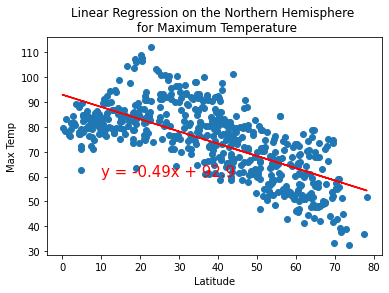

In [12]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,60))

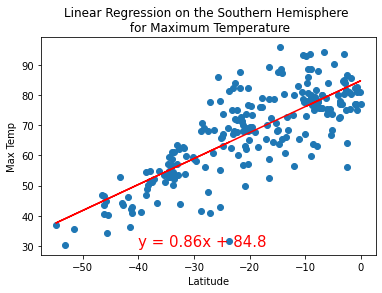

In [13]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-40,30))

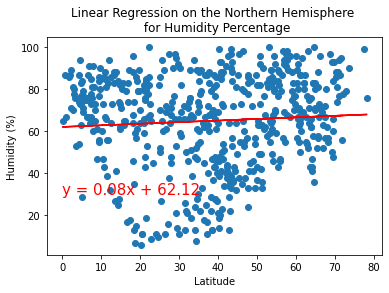

In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity Percentage', 'Humidity (%)',(0,30))

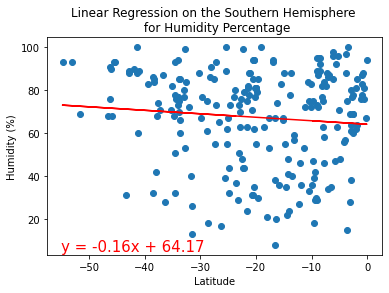

In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity Percentage', 'Humidity (%)',(-55,5))

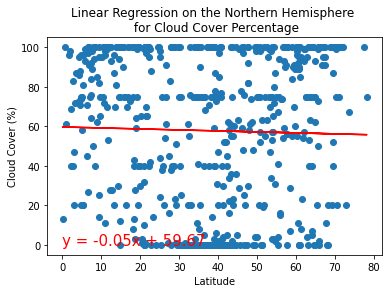

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloud Cover Percentage', 'Cloud Cover (%)',(0,0))

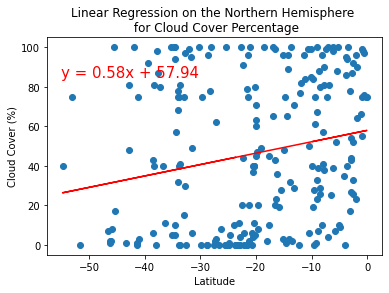

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloud Cover Percentage', 'Cloud Cover (%)',(-55,85))

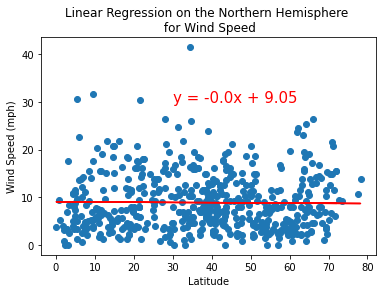

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(30,30))

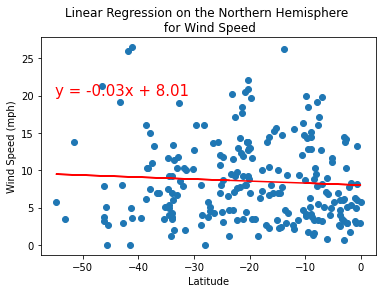

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,20))